# Machine Learning

### 2. Can you group the customers  by purchasing behavior? (clustering)

## Import Library

In [1]:
# Import Library
import pandas as pd
import os

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

pd.options.mode.chained_assignment = None
pd.options.display.float_format = '{:.2f}'.format

## Prepare Data

In [2]:
data_dir = "clean_data"
OCNR = pd.read_csv(f"{data_dir}/OCNR.csv")
SNR = pd.read_csv(f"{data_dir}/SNR.csv")
L = pd.read_csv(f"{data_dir}/L.csv")
P = pd.read_csv(f"{data_dir}/P.csv")
PS = pd.read_csv(f"{data_dir}/PS.csv")

In [3]:
LOCNR = pd.merge(left = L,
                 right=OCNR,
                 left_on='L_ORDERKEY',
                 right_on='O_ORDERKEY',
                 how='inner')

In [4]:
LOCNRP = pd.merge(left = LOCNR,
                  right = P,
                  left_on = 'L_PARTKEY',
                  right_on = 'P_PARTKEY',
                  how = 'inner')

In [5]:
LOCNRP['DUMMY_COUNT'] = 1

In [6]:
LOCNRP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235939 entries, 0 to 235938
Data columns (total 50 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0_x     235939 non-null  int64  
 1   L_ORDERKEY       235939 non-null  int64  
 2   L_PARTKEY        235939 non-null  int64  
 3   L_SUPPKEY        235939 non-null  int64  
 4   L_LINENUMBER     235939 non-null  int64  
 5   L_QUANTITY       235939 non-null  int64  
 6   L_EXTENDEDPRICE  235939 non-null  float64
 7   L_DISCOUNT       235939 non-null  float64
 8   L_TAX            235939 non-null  float64
 9   L_RETURNFLAG     235939 non-null  object 
 10  L_LINESTATUS     235939 non-null  object 
 11  L_SHIPDATE       235939 non-null  object 
 12  L_COMMITDATE     235939 non-null  object 
 13  L_RECEIPTDATE    235939 non-null  object 
 14  L_SHIPINSTRUCT   235939 non-null  object 
 15  L_SHIPMODE       235939 non-null  object 
 16  L_COMMENT        0 non-null       floa

In [7]:
# Add a new aggregated column TOTAL_ORDERS to show how many orders does each customer have
AGG_df2 = LOCNRP.groupby(['O_CUSTKEY'], as_index=False).agg(
    SUM_QUANTITY=("L_QUANTITY", 'sum'),
    MEAN_QUANTITY=("L_QUANTITY", 'mean'),
    MEAN_EXTENDEDPRICE=("L_EXTENDEDPRICE",'mean'),
    MEAN_TAX=("L_TAX",'mean'),
    MEAN_RETAILPRICE=("P_RETAILPRICE",'mean'),
    MEAN_LEADDAY=("LEADDAY",'mean'),
    MAX_LEADDAY=("LEADDAY",'max'),
    MIN_LEADDAY=("LEADDAY",'min'),
    SUM_TOTAL_SALE=("O_TOTALPRICE",'sum'),
    MEAN_TOTAL_SALE=("O_TOTALPRICE",'mean'),
    TOTAL_ORDERS=("DUMMY_COUNT",'sum')
)

In [8]:
AGG_df2.head()

,O_CUSTKEY,SUM_QUANTITY,MEAN_QUANTITY,MEAN_EXTENDEDPRICE,MEAN_TAX,MEAN_RETAILPRICE,MEAN_LEADDAY,MAX_LEADDAY,MIN_LEADDAY,SUM_TOTAL_SALE,MEAN_TOTAL_SALE,TOTAL_ORDERS
0,8,236,29.50,43465.57,0.04,1513.91,109.50,180.00,38.00,1105884.85,138235.61,8
1,10,67,22.33,30768.97,0.05,1442.14,186.00,186.00,186.00,281153.85,93717.95,3
2,11,237,33.86,51876.30,0.02,1504.11,347.00,439.00,117.00,1772107.19,253158.17,7
3,13,69,34.50,57111.47,0.05,1635.60,386.00,386.00,386.00,234009.96,117004.98,2
4,16,263,20.23,31391.27,0.05,1433.60,129.23,188.00,9.00,2595731.09,199671.62,13


## K-Mean Clustering

### Elbow Method

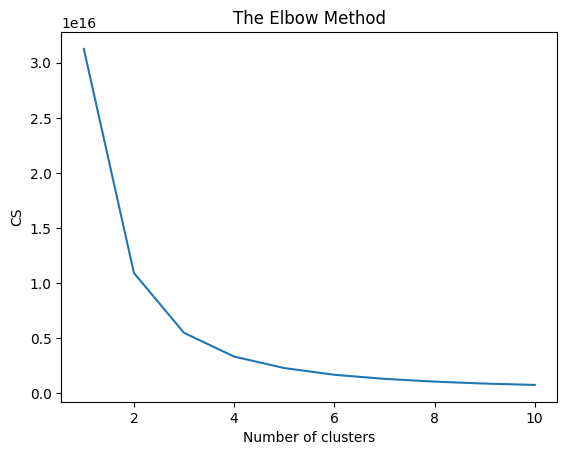

In [9]:
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(AGG_df2)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

### Train Model

In [10]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,random_state=1)

kmeans.fit(AGG_df2)

AGG_df2['CLUSTER'] = kmeans.labels_

In [11]:
AGG_df2.head(10)

,O_CUSTKEY,SUM_QUANTITY,MEAN_QUANTITY,MEAN_EXTENDEDPRICE,MEAN_TAX,MEAN_RETAILPRICE,MEAN_LEADDAY,MAX_LEADDAY,MIN_LEADDAY,SUM_TOTAL_SALE,MEAN_TOTAL_SALE,TOTAL_ORDERS,CLUSTER
0,8,236,29.50,43465.57,0.04,1513.91,109.50,180.00,38.00,1105884.85,138235.61,8,2
1,10,67,22.33,30768.97,0.05,1442.14,186.00,186.00,186.00,281153.85,93717.95,3,0
2,11,237,33.86,51876.30,0.02,1504.11,347.00,439.00,117.00,1772107.19,253158.17,7,3
3,13,69,34.50,57111.47,0.05,1635.60,386.00,386.00,386.00,234009.96,117004.98,2,0
4,16,263,20.23,31391.27,0.05,1433.60,129.23,188.00,9.00,2595731.09,199671.62,13,1
5,19,175,25.00,33027.51,0.05,1343.63,309.71,620.00,77.00,1512166.32,216023.76,7,3
6,20,28,28.00,34362.44,0.05,1227.23,276.00,276.00,276.00,34276.52,34276.52,1,0
7,22,113,22.60,36763.67,0.06,1469.46,162.00,162.00,162.00,1327037.75,265407.55,5,2
8,29,131,26.20,36005.69,0.05,1316.31,490.00,490.00,490.00,918062.95,183612.59,5,2
9,32,141,28.20,48224.06,0.03,1644.41,811.40,1167.00,278.00,1316300.05,263260.01,5,2


### Result

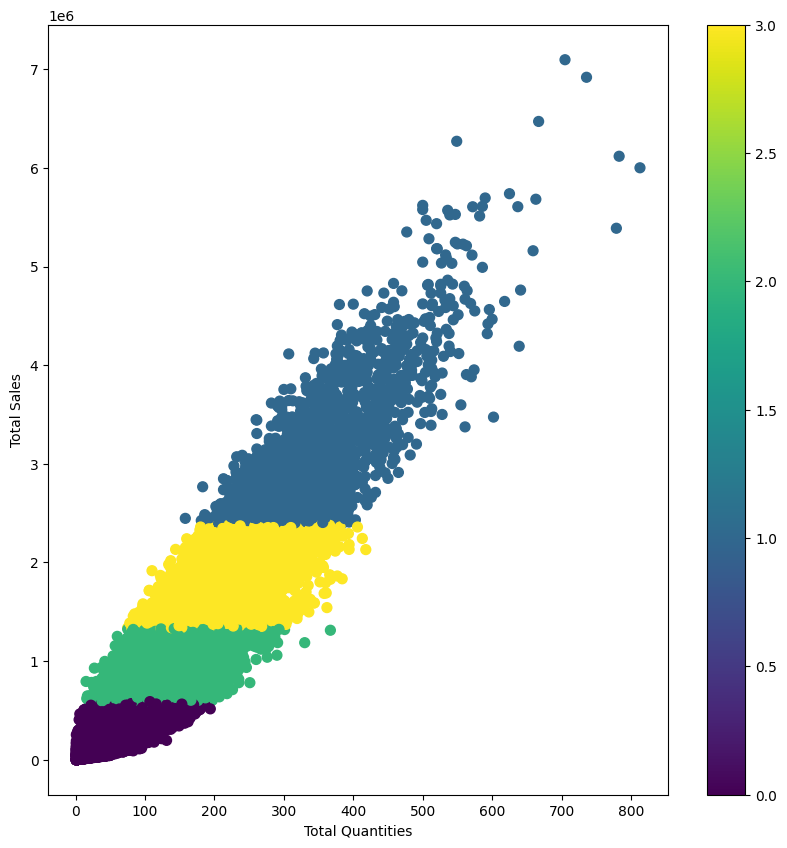

In [12]:
x = AGG_df2['SUM_QUANTITY']
y = AGG_df2['SUM_TOTAL_SALE']
Cluster = AGG_df2['CLUSTER']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

scatter = ax.scatter(x,y,c=Cluster,s=50)
ax.set_xlabel('Total Quantities')
ax.set_ylabel('Total Sales')
plt.colorbar(scatter)

#fig.savefig('ClusterSales.png', bbox_inches='tight')
#fig.show()

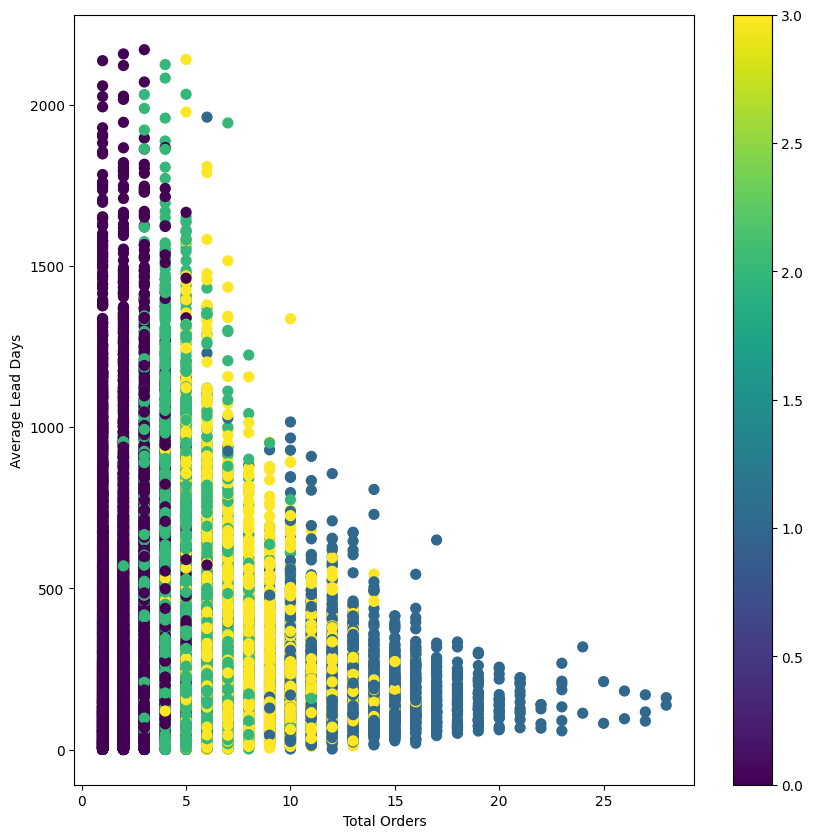

In [13]:
x = AGG_df2['TOTAL_ORDERS']
y = AGG_df2['MEAN_LEADDAY']
Cluster = AGG_df2['CLUSTER']

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

scatter = ax.scatter(x,y,c=Cluster,s=50)
ax.set_xlabel('Total Orders')
ax.set_ylabel('Average Lead Days')
plt.colorbar(scatter)

#fig.savefig('ClusterOrders.png', bbox_inches='tight')
#fig.show()

## Download Data

In [14]:
#Create output folder if not exist
if not os.path.exists("output"):
    os.makedirs("output")

data_dir = "output"

#Download modeled data into output folder
AGG_df2.to_csv(f"{data_dir}/Lab1-2.csv")